In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

### How many rows/columns are there?

In [4]:
data.shape

(8950, 18)

### How many customers are there?

In [6]:
data['CUST_ID'].nunique()

8950

This means, we have 200 unique customer IDs

### How many of each TENURE type are there?

In [10]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

This means, range of tenure is 9 to 12

### How does the BALANCE of our customers look like?

Descriptive Statistics

In [12]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

The BALANCE ranges from 0 TO 19,043 with an average (median) BALANCE is 873

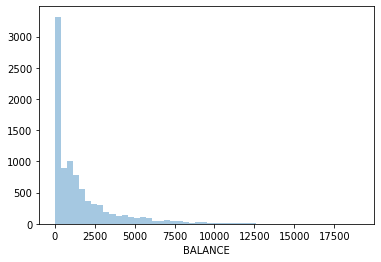

In [13]:
sns.distplot(data['BALANCE'], kde=False)

### How does the CASH ADVANCE distribution look like?

In [17]:
data['CASH_ADVANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%        238.633724
70%        797.272297
80%       1574.933778
90%       3065.534560
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

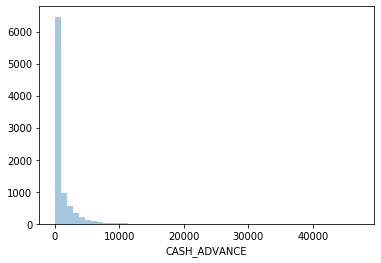

In [20]:
sns.distplot(data['CASH_ADVANCE'], kde=False)

CASH ADVANCE is highly skewed to the right (heavy on 0).

### How does the PAYMENTS distribution look like?

In [21]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

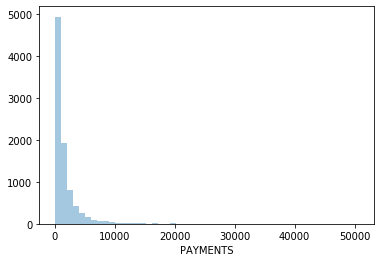

In [22]:
sns.distplot(data['PAYMENTS'], kde=False)

PAYMENTS is highly skewed to the right (heavy on 0).

# Clustering

In [29]:
from sklearn.cluster import KMeans

In [30]:
# Get features we need
# trial 1: 2 features only
# features = ['Annual Income (k$)', 'Spending Score (1-100)']
# X = data[features]


# trial 2: 3 features
features = ['BALANCE', 'CASH_ADVANCE']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,CASH_ADVANCE
0,40.900749,0.000000
1,3202.467416,6442.945483
2,2495.148862,0.000000
3,1666.670542,205.788017
4,817.714335,0.000000


In [31]:
!pip install hvplot

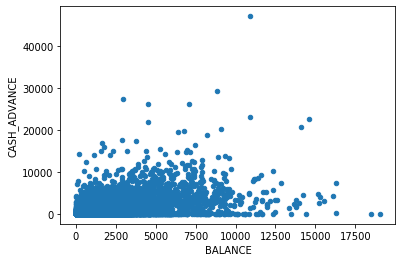

In [33]:
# If you have 2 features, you can plot it on a 2D scatter plot

# if more than 2 features, it's not plottable like this

X.plot.scatter('BALANCE', 'CASH_ADVANCE')

### Choosing Optimal *k*

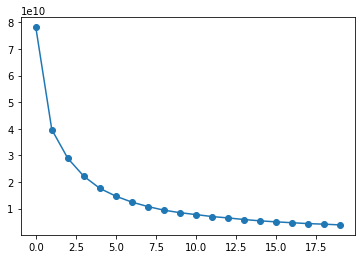

In [34]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*.

In [35]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 3, random_state = 42) #what is this for? How do you choose 42?

# Fit data to model
km.fit(X) #there's no Y because unsupervised learning

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [36]:
new_data.head()

,BALANCE,CASH_ADVANCE,labels
0,40.900749,0.000000,0
1,3202.467416,6442.945483,1
2,2495.148862,0.000000,0
3,1666.670542,205.788017,0
4,817.714335,0.000000,0


### Plot Centers and labels

In [37]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black
            
#question: how come if 3 feaures, the colored clustering graph still works? what's in the x axis?

SyntaxError: EOL while scanning string literal (<ipython-input-37-8429ab02fa8a>, line 10)

# Deep Dive to each cluster

In [40]:
#what's the difference among the clusters? Explain.

#python starts clusters with 0
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()


#in clusters, you have to ambiguously label them. Be creative like "Average Joe"

,BALANCE,CASH_ADVANCE,labels
count,7256.000000,7256.000000,7256.0
mean,777.895585,380.435029,0.0
std,809.930905,747.094558,0.0
min,0.000000,0.000000,0.0
25%,79.315030,0.000000,0.0
50%,482.217943,0.000000,0.0
75%,1258.305517,397.781810,0.0
max,3504.329825,5625.798427,0.0


Cluster 0: Low balance, no cash advance

In [41]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,CASH_ADVANCE,labels
count,264.000000,264.000000,264.0
mean,5349.091077,9674.193664,1.0
std,2817.992821,4545.848939,0.0
min,78.114579,5690.168909,1.0
25%,3372.882428,7017.694895,1.0
50%,5133.421856,8372.723669,1.0
75%,7128.204928,10510.775057,1.0
max,16304.889250,47137.211760,1.0


Cluster 1: High balance & High cash advance

In [43]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,CASH_ADVANCE,labels
count,1430.000000,1430.000000,1430.0
mean,4856.978531,2410.120812,2.0
std,2388.680532,1751.895171,0.0
min,752.261050,0.000000,2.0
25%,3239.043183,789.319409,2.0
50%,4377.389821,2426.100283,2.0
75%,5852.106376,3767.025605,2.0
max,19043.138560,6173.682877,2.0


Cluster 2: Mid balance, mid cash advance



# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

Cluster 3: Low Income & High Spend

If 3 features (income, spending score, age):
Cluster 3: The saktong ninongs and ninangs: Mid income, mid spend, mid-life crisis

In [44]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,BALANCE,CASH_ADVANCE,labels
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


Cluster 4: stopped

# Exercise: Add more features to X and see the results of the clusters.

# Explore [Agglomerative Clustering](https://colab.research.google.com/drive/1IcjI_ac1gNipwTZv3WYYzeQNx-arqRl7)


# Homework: Perform Clustering on [Credit Card Dataset](https://drive.google.com/file/d/1EtH7Y4Y8zVcUWj9y3EnU1i7Vx2By2_LI/view?usp=sharing).